In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Big Data Communications/Cyber-RF_Anomaly_Detector_Challenge_Dataset_TrainingSet_80.csv"

https://rfchallenge.mit.edu/challenge-3/

# Data understanding and preprocessing

In [ ]:
dataset = pd.read_csv(path)
dataset.head()

,Amp_min,Amp_max,Amp_var,Amp_skew,Amp_rango,Amp_Kurtosis,Amp_entropy,Phase_min,Phase_var,Phase_skew,...,numPktSent_avg,NoBytesSnt_avg,minPktSize_min,maxPktSize_max,avgPktSz_avg,pktps_avg,bytps_avg,maxIAT_max,avgIAT_avg,Class
0,0.002581,0.690256,0.001211,15.12232,0.690256,240.0694,0.074172,0.090118,3.381202,0.038622,...,112,5615.0,17,51,50.13393,1.003314,50.30009,1.671043,0.996696,anomalous
1,0.003153,0.848947,0.001835,14.98176,0.848947,234.9678,0.074256,0.100556,3.374530,0.028128,...,113,5698.0,49,51,50.42478,1.012288,51.04442,1.669502,0.987861,anomalous
2,0.002031,0.410564,0.000674,13.88586,0.410564,194.0342,0.071829,0.094839,3.399020,0.033839,...,113,5766.0,50,52,51.02655,1.008791,51.47511,1.004366,0.991286,normal
3,0.003371,1.206924,0.002163,15.24407,1.206924,246.8864,0.069905,-0.083725,4.067368,0.188521,...,113,5709.0,49,51,50.52213,1.011909,51.12378,1.431243,0.988232,anomalous
4,0.002116,0.425429,0.000730,13.87303,0.425429,193.6966,0.072375,-0.204406,3.801740,0.313063,...,113,5766.0,50,52,51.02655,1.008784,51.47479,1.006097,0.991292,normal


In [ ]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Amp_min,730.0,3.529021e-03,1.459747e-03,1.133216e-03,2.163063e-03,3.384877e-03,5.449072e-03,5.777930e-03
Amp_max,730.0,8.526778e-01,3.210208e-01,3.034023e-01,4.991391e-01,7.927574e-01,1.198854e+00,1.350574e+00
Amp_var,730.0,2.661073e-03,1.988193e-03,1.922670e-04,8.133360e-04,2.097280e-03,5.394264e-03,5.801405e-03
Amp_skew,730.0,1.465611e+01,1.285113e+00,1.377451e+01,1.387041e+01,1.394878e+01,1.497438e+01,2.088314e+01
Amp_rango,730.0,8.526778e-01,3.210208e-01,3.034023e-01,4.991391e-01,7.927574e-01,1.198854e+00,1.350574e+00
Amp_Kurtosis,730.0,2.213158e+02,4.429297e+01,1.909436e+02,1.936372e+02,1.958621e+02,2.355504e+02,4.597214e+02
Amp_entropy,730.0,8.399393e-02,9.858844e-02,5.112217e-02,7.126663e-02,7.219802e-02,7.279438e-02,9.364750e-01
Phase_min,730.0,9.229299e-02,1.572373e-01,-6.507383e-01,7.668512e-02,8.752052e-02,9.810372e-02,6.607894e-01
Phase_var,730.0,3.338535e+00,3.186579e-01,2.121101e+00,3.339821e+00,3.364618e+00,3.382831e+00,4.149717e+00
Phase_skew,730.0,3.414417e-02,1.589286e-01,-6.694941e-01,2.902611e-02,4.076252e-02,5.143496e-02,6.881828e-01


We can clearly see that we have many different features and they vary greatly in size. This tells us that we may need to extract the best features and to normalize the values. The fomer is done using mutual information and the latter is done with a normalization layer.

Additionally, we need to convert the labels from normal/anomalous to 0/1.

In [ ]:
category_mapping = {"normal": 0, "anomalous": 1}
dataset = dataset.applymap(lambda x: category_mapping.get(x) if x in category_mapping else x)

In [ ]:
dataset.head()

,Amp_min,Amp_max,Amp_var,Amp_skew,Amp_rango,Amp_Kurtosis,Amp_entropy,Phase_min,Phase_var,Phase_skew,...,numPktSent_avg,NoBytesSnt_avg,minPktSize_min,maxPktSize_max,avgPktSz_avg,pktps_avg,bytps_avg,maxIAT_max,avgIAT_avg,Class
0,0.002581,0.690256,0.001211,15.12232,0.690256,240.0694,0.074172,0.090118,3.381202,0.038622,...,112,5615.0,17,51,50.13393,1.003314,50.30009,1.671043,0.996696,1
1,0.003153,0.848947,0.001835,14.98176,0.848947,234.9678,0.074256,0.100556,3.374530,0.028128,...,113,5698.0,49,51,50.42478,1.012288,51.04442,1.669502,0.987861,1
2,0.002031,0.410564,0.000674,13.88586,0.410564,194.0342,0.071829,0.094839,3.399020,0.033839,...,113,5766.0,50,52,51.02655,1.008791,51.47511,1.004366,0.991286,0
3,0.003371,1.206924,0.002163,15.24407,1.206924,246.8864,0.069905,-0.083725,4.067368,0.188521,...,113,5709.0,49,51,50.52213,1.011909,51.12378,1.431243,0.988232,1
4,0.002116,0.425429,0.000730,13.87303,0.425429,193.6966,0.072375,-0.204406,3.801740,0.313063,...,113,5766.0,50,52,51.02655,1.008784,51.47479,1.006097,0.991292,0


We also need to check if the dataset contains any null-values.

In [ ]:
print(dataset.isnull().any())

Amp_min           False
Amp_max           False
Amp_var           False
Amp_skew          False
Amp_rango         False
Amp_Kurtosis      False
Amp_entropy       False
Phase_min         False
Phase_var         False
Phase_skew        False
Phase_entropy     False
RMS_max           False
RMS_skew          False
RMS_rango         False
RMS_Kurtosis      False
RMS_entropy       False
SP_min            False
SP_max            False
SP_var            False
SP_skew           False
SP_rango          False
SP_Kurtosis       False
SP_entropy        False
SP_stError        False
FFT_min           False
FFT_max           False
FFT_avg           False
FFT_median        False
FFT_var           False
FFT_skew          False
FFT_rango         False
FFT_Kurtosis      False
FFT_entropy       False
FFT_stError       False
Pd_max            False
Pd_avg            False
Pd_var            False
Pd_skew           False
Pd_rango          False
Pd_Kurtosis       False
Pd_entropy        False
Duration_Avg    

Checking if there is a class imbalance:

In [ ]:
dataset['Class'].value_counts()

1    381
0    349
Name: Class, dtype: int64

In [ ]:
x = dataset.copy()
y = x.pop("Class")

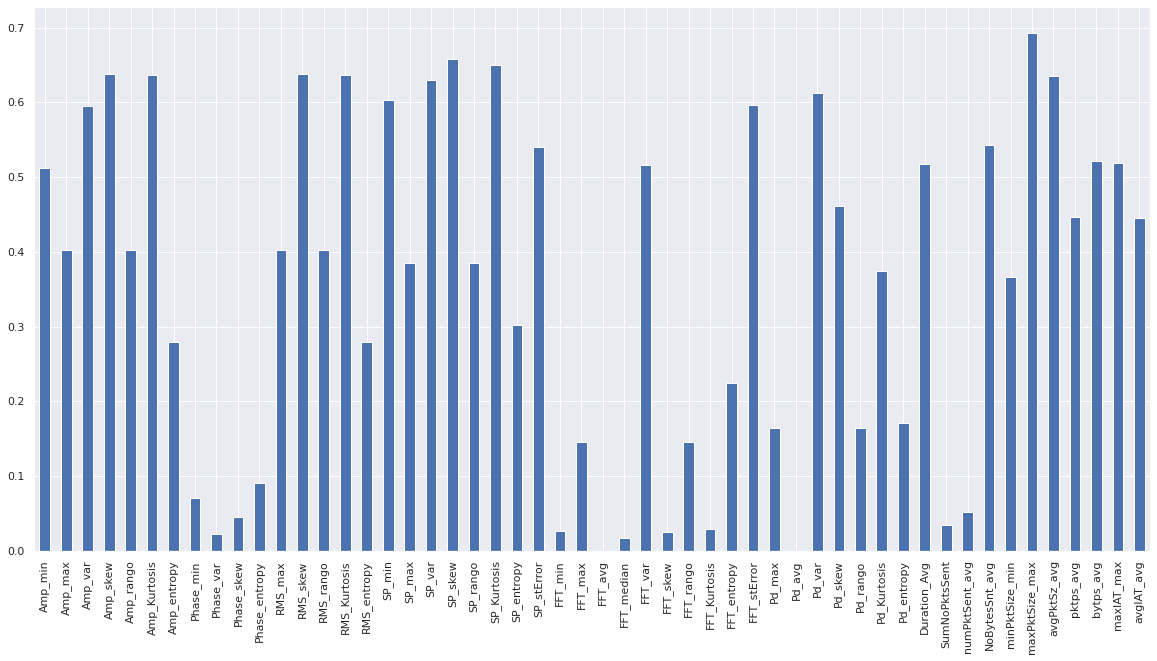

In [ ]:
importances = mutual_info_classif(x, y)
feature_importances = pd.Series(importances, dataset.columns[0:len(dataset.columns)-1])
feature_importances.plot(kind='bar', figsize=(20,10))
plt.show()

In [ ]:
best_features = feature_importances.sort_values(ascending=False).head(10)
best_features = list(best_features.index)
print(best_features)

['maxPktSize_max', 'SP_skew', 'SP_Kurtosis', 'RMS_skew', 'Amp_skew', 'RMS_Kurtosis', 'Amp_Kurtosis', 'avgPktSz_avg', 'SP_var', 'Pd_var']


**Description of the best features:**
*   maxPktSize_max: Largest layer 3 packet size
*   SP_skew: Skewness of the signal power measurement
*   SP_Kurtosis: Kurtosis of the signal power measurement
*   RMS_skew: Skewness of the RMS measurement
*   Amp_skew: Skewness of the amplitude measurement
*   RMS_Kurtosis: Kurtosis of the RMS measurement
*   Amp_Kurtosis: Kurtosis of the amplitude measurement
*   avgPktSz_avg: Average packet load ratio
*   SP_var: Variance of the signal power measurement
*   Pd_var: Variance of the periodogram measurement












In [ ]:
df = dataset[best_features]

In [ ]:
x = df
y = dataset['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=1)

After extracting the 10 best features, we get a much smaller dataset:

In [ ]:
x_train.head()

,maxPktSize_max,SP_skew,SP_Kurtosis,RMS_skew,Amp_skew,RMS_Kurtosis,Amp_Kurtosis,avgPktSz_avg,SP_var,Pd_var
212,51,17.38842,305.7211,17.23259,17.23259,298.5829,298.5828,50.19469,0.004430,5.760000e-06
465,51,14.02083,198.7949,14.97397,14.97392,234.7305,234.7305,49.82143,0.006352,8.030000e-06
607,51,16.96565,305.0117,14.97477,14.97471,233.3874,233.3874,50.03478,0.001043,1.180000e-06
116,52,13.93248,195.9508,13.87930,13.87929,193.8497,193.8497,51.00901,0.006021,1.580000e-06
69,52,13.94896,196.4265,13.88748,13.88749,194.1002,194.1002,51.02655,0.000124,1.510000e-07


# Creating a model

The classification is done using a neural network. Since it is a binary classification problem, the final classification layer uses a sigmoid activation function and we use binary crossentropy as loss.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Normalization(axis=-1),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 50, batch_size=200)

Epoch 1/50
3/3 [==============================] - 1s 108ms/step - loss: 4.2037 - accuracy: 0.5788 - val_loss: 0.7624 - val_accuracy: 0.4658
Epoch 2/50
3/3 [==============================] - 0s 29ms/step - loss: 2.8974 - accuracy: 0.6336 - val_loss: 2.7056 - val_accuracy: 0.6644
Epoch 3/50
3/3 [==============================] - 0s 25ms/step - loss: 1.6824 - accuracy: 0.7055 - val_loss: 0.3363 - val_accuracy: 0.9384
Epoch 4/50
3/3 [==============================] - 0s 32ms/step - loss: 1.5479 - accuracy: 0.6541 - val_loss: 0.5161 - val_accuracy: 0.8699
Epoch 5/50
3/3 [==============================] - 0s 30ms/step - loss: 1.0235 - accuracy: 0.7911 - val_loss: 0.7293 - val_accuracy: 0.8356
Epoch 6/50
3/3 [==============================] - 0s 25ms/step - loss: 1.0229 - accuracy: 0.7842 - val_loss: 0.2259 - val_accuracy: 0.9384
Epoch 7/50
3/3 [==============================] - 0s 38ms/step - loss: 0.8029 - accuracy: 0.7466 - val_loss: 0.2919 - val_accuracy: 0.9178
Epoch 8/50
3/3 [==========

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, 10)               21        
 ion)                                                            
                                                                 
 dense_20 (Dense)            (None, 256)               2816      
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               65792     
                                                                 
 dense_22 (Dense)            (None, 64)                16448     
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                      

# Evaluation

We can see from both the validation accuracy from the training and the confusion matrix below that the model's performance is very good. It classified the entire test set without making any mistakes.

[]

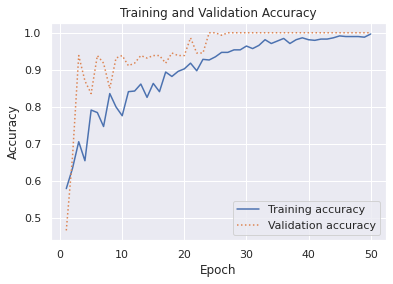

In [ ]:
%matplotlib inline
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

5/5 [==============================] - 0s 3ms/step


Text(89.18, 0.5, 'Actual label')

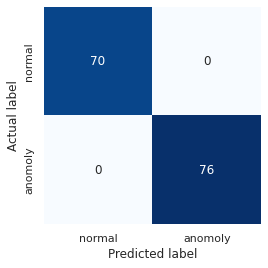

In [ ]:
y_predicted = model.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['normal', 'anomoly']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')